In [ ]:
import typing
import itertools

import pandas
import seaborn
from matplotlib import pyplot


In [5]:
DATA_PATH: str = "../../data/interim/twitter"

METRICS: typing.List[str] = [
    "public_metrics.like_count",
    "public_metrics.retweet_count",
    "public_metrics.reply_count",
]

In [9]:
dataset = pandas.read_csv(f"{DATA_PATH}.german.posts.csv", index_col=[0])
dataset.head()

,id,author_id,conversation_id,text,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,public_metrics.bookmark_count,created_at,username,twitter_username,first_name,last_name,party,role
3,1645675247595581440,1040160799208161280,1645675245141884928,Wenn wir Männern wie Xi &amp; Putin signalisie...,48,30,356,6,17359,NaN,2023-04-11T06:28:48.000Z,n_roettgen,n_roettgen,Norbert,Röttgen,CDU/CSU,MdB
4,1621500636197003265,1040160799208161280,1621500633403604992,Als Opposition ist es unsere demokratische Auf...,71,18,402,1,7569,NaN,2023-02-03T13:27:32.000Z,n_roettgen,n_roettgen,Norbert,Röttgen,CDU/CSU,MdB
7,1613459277477302273,1040160799208161280,1613459266932703232,"5/6 Der Idealfall wäre, wenn Deutschland jetzt...",68,15,649,2,10753,NaN,2023-01-12T08:54:03.000Z,n_roettgen,n_roettgen,Norbert,Röttgen,CDU/CSU,MdB
8,1613459271672266752,1040160799208161280,1613459266932703232,"3/6 Immer mehr Staaten begreifen, dass der Kri...",47,8,522,0,8803,NaN,2023-01-12T08:54:01.000Z,n_roettgen,n_roettgen,Norbert,Röttgen,CDU/CSU,MdB
9,1645389288551358465,1040160799208161280,1645389286978600964,"Selbiger 🇫🇷 Präsident, der vor einiger Zeit di...",61,24,792,4,25793,NaN,2023-04-10T11:32:30.000Z,n_roettgen,n_roettgen,Norbert,Röttgen,CDU/CSU,MdB


<Axes: xlabel='week', ylabel='count'>

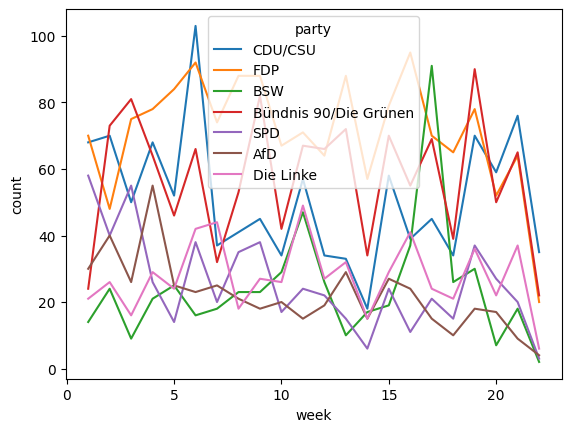

In [20]:
seaborn.lineplot(
    data=(
        dataset
        .pipe(lambda _df: _df.assign(created_at=pandas.to_datetime(_df["created_at"])))
        .pipe(lambda _df: _df.assign(week=_df["created_at"].dt.isocalendar().week))
        .pipe(lambda _df: _df[_df["week"] != 52])
        [["party", "week"]]
        .value_counts()
        .to_frame()
        .reset_index()
    ),
    x="week",
    y="count",
    hue="party",
)

In [18]:
(
    dataset[["party", *METRICS]]
    .groupby("party")
    .agg(
        [
            "min",
            "max",
            "mean",
            "std",
        ]
    )
    .sort_values(by=("public_metrics.like_count", "mean"), ascending=False)
    .round(3)
    .style
    .format({key: "{:.1f}" for key in itertools.product(METRICS, ["mean", "std"])})
    .background_gradient()
    #.to_latex(convert_css=True)
)

In [17]:
(
    dataset[["username", *METRICS]]
    .groupby("username")
    .agg(
        [
            "min",
            "max",
            "mean",
            "std",
        ]
    )
    .sort_values(by=("public_metrics.like_count", "mean"), ascending=False)
    .round(3)
    .style
    .format({key: "{:.1f}" for key in itertools.product(METRICS, ["mean", "std"])})
    .background_gradient()
    #.to_latex(convert_css=True)
)